In [2]:
#  Importando as bibliotecas que serão utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
import keras_tuner as kt
from tensorflow.keras import Sequential

In [3]:
# Lendo o arquivo e visualizando as informações do dataset
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
# Visualizando os tipos de informação presentes em cada coluna
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


(4746, 12)

In [5]:
# Verificando e somando a quantidade de dados nulos em casa coluna
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
# Verificando a quantidade de valores únicos em cada coluna
data.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [7]:
#  Começando a tratar os dados
#  -> Nesse ponto é necessário ter bem definido o que deseja análisar,
#  o que precisa obter com o código, para definir quais dados serão úteis
#  e quais serão utilizados para a analise.

In [8]:
# Categorizando os valores de aluguel por faixa de valor

conditions = [
    (data["Rent"] <= 2000),
    (data["Rent"] > 2000) & (data["Rent"] <= 3000),
    (data["Rent"] > 3000) & (data["Rent"] <= 4000),
    (data["Rent"] > 4000) & (data["Rent"] <= 5000),
    (data["Rent"] > 5000) & (data["Rent"] <= 6000),
    (data["Rent"] > 6000) & (data["Rent"] <= 7000),
    (data["Rent"] > 7000) & (data["Rent"] <= 8000),
    (data["Rent"] > 8000) & (data["Rent"] <= 9000),
    (data["Rent"] > 9000) & (data["Rent"] <= 10000),
    (data["Rent"] > 10000)
    ]

# Criando uma lista de valores para atribuir a cada "categoria" de valor
values = ["0-2000", "2001-3000","3001-4000","4001-5000", "5001-6000", "6001-7000","7001-8000","8001-9000","9001-10000", "10000+"]


# criando uma nova coluna com os valores atribuídos
data["Aluguel"] = np.select(conditions, values)
data.head(4)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Aluguel
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9001-10000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9001-10000


In [9]:
# Categorizando os tamanhos do imóvel por faixa de tamanho

conditions = [
    (data["Size"] <= 600),
    (data["Size"] > 600) & (data["Size"] <= 1500),
    (data["Size"] > 1500) & (data["Size"] <= 3000),
    (data["Size"] > 3000)
    ]

# Criando uma lista de valores para atribuir a cada "categoria" de tamanho
values = ["pequeno", "médio", "grande", "super"]


# criando uma nova coluna com os valores atribuídos
data["Tamanho"] = np.select(conditions, values)
data.head(4)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Aluguel,Tamanho
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9001-10000,médio
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+,médio
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,10000+,médio
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9001-10000,médio


In [10]:
# Limpando o dataset das colunas que não serão utilizadas

data.drop(["Posted On", "Tenant Preferred", "Point of Contact", "Furnishing Status", "Size", "Rent"], axis=1, inplace=True)
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,Ground out of 2,Super Area,Bandel,Kolkata,2,9001-10000,médio
1,2,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1 out of 2,Super Area,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1 out of 2,Carpet Area,South Dum Dum,Kolkata,1,7001-8000,médio


In [11]:
# Na coluna "Floor" que descreve a quantidade de pavimentos 
# irei "limpar" os dados para manter somente o andar em
# que se encontra o imóvel para locação

data["Floor"] = data["Floor"].apply(lambda x: x.split(' out of ')[0])
data.loc[data["Floor"].str.contains("Ground"), "Floor"] = "0"
data.loc[data["Floor"].str.contains("Basement"), "Floor"] = "0"
data["Floor"]=data["Floor"].astype(int)

# Vendo como ficaram os dados após o ajuste

data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,Super Area,Bandel,Kolkata,2,9001-10000,médio
1,2,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1,Super Area,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1,Super Area,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1,Carpet Area,South Dum Dum,Kolkata,1,7001-8000,médio


In [12]:
#  A partir de agora irei realizar a discretização dos dados.
#  Começando pelo tipo de área (Area Type) - usando o Label Encoder.

tipo_area = data["Area Type"].values
labelencoder_tipo_area = LabelEncoder()
tipo_area = labelencoder_tipo_area.fit_transform(tipo_area)

data["Area Type"] = tipo_area
data.head()


,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,Bandel,Kolkata,2,9001-10000,médio
1,2,1,2,"Phool Bagan, Kankurgachi",Kolkata,1,10000+,médio
2,2,1,2,Salt Lake City Sector 2,Kolkata,1,10000+,médio
3,2,1,2,Dumdum Park,Kolkata,1,9001-10000,médio
4,2,1,1,South Dum Dum,Kolkata,1,7001-8000,médio


In [13]:
#  Discretizando a localidade (Area Locality) - usando o Label Encoder. 

local_area = data["Area Locality"].values
labelencoder_local_area = LabelEncoder()
local_area = labelencoder_local_area.fit_transform(local_area)

data["Area Locality"] = local_area
data.head()


,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,Kolkata,2,9001-10000,médio
1,2,1,2,1527,Kolkata,1,10000+,médio
2,2,1,2,1760,Kolkata,1,10000+,médio
3,2,1,2,526,Kolkata,1,9001-10000,médio
4,2,1,1,1890,Kolkata,1,7001-8000,médio


In [14]:
#  Discretizando a cidade (City) - usando o Label Encoder.

cidade = data["City"].values
labelencoder_cidade = LabelEncoder()
cidade = labelencoder_cidade.fit_transform(cidade)

data["City"] = cidade
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9001-10000,médio
1,2,1,2,1527,4,1,10000+,médio
2,2,1,2,1760,4,1,10000+,médio
3,2,1,2,526,4,1,9001-10000,médio
4,2,1,1,1890,4,1,7001-8000,médio


In [15]:
#  Discretizando o tamanho - usando o Label Encoder.

tamanho = data["Tamanho"].values
labelencoder_tamanho = LabelEncoder()
tamanho = labelencoder_tamanho.fit_transform(tamanho)

data["Tamanho"] = tamanho
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9001-10000,1
1,2,1,2,1527,4,1,10000+,1
2,2,1,2,1760,4,1,10000+,1
3,2,1,2,526,4,1,9001-10000,1
4,2,1,1,1890,4,1,7001-8000,1


In [16]:
# Discretizando o Aluguel
aluguel = data["Aluguel"].values
labelencoder_aluguel = LabelEncoder()
aluguel = labelencoder_aluguel.fit_transform(aluguel)

data["Aluguel"] = aluguel
data.head()

,BHK,Floor,Area Type,Area Locality,City,Bathroom,Aluguel,Tamanho
0,2,0,2,221,4,2,9,1
1,2,1,2,1527,4,1,1,1
2,2,1,2,1760,4,1,1,1
3,2,1,2,526,4,1,9,1
4,2,1,1,1890,4,1,7,1


In [17]:
# Verificando a quantidade de valores únicos em cada coluna
data.nunique()

BHK                 6
Floor              52
Area Type           3
Area Locality    2235
City                6
Bathroom            8
Aluguel            10
Tamanho             4
dtype: int64

In [18]:
# Separando o dataset em conjunto de treino e de teste

df_train, df_test=train_test_split(data, 
                                   test_size=0.3, 
                                   random_state=20)


In [19]:
# verificando as informações de formato de cada conjunto
# treinamento e teste

df_train.shape, df_test.shape

((3322, 8), (1424, 8))

In [23]:
#  Criando o X e y e definindo os conjuntos - Nesse ponto irei definir 3 conjuntos
# que irei utilizar para ajustar os hiperparametros do tensor flow e verificar se há
# alteração na acuracidade.
# No último conjunto será utilizado o Keras Tuner.

# Conjunto 1
X_train= df_train.drop(["Aluguel"], axis=1)
y_train= df_train["Aluguel"]
X_test=df_test.drop(["Aluguel"], axis=1)
y_test=df_test["Aluguel"]

# Conjunto 2
X_train2= df_train.drop(["Aluguel"], axis=1)
y_train2= df_train["Aluguel"]
X_test2=df_test.drop(["Aluguel"], axis=1)
y_test2=df_test["Aluguel"]

# Conjunto 3

X_train3= df_train.drop(["Aluguel"], axis=1)
y_train3= df_train["Aluguel"]
X_test3=df_test.drop(["Aluguel"], axis=1)
y_test3=df_test["Aluguel"]


In [24]:
#  Verificando se os X_train e X_teste de todos os conjuntos ficaram corretos

print("Conjunto 1:", len(X_train), len(X_test))
print("Conjunto 2:", len(X_train2), len(X_test2))
print("Conjunto 3:", len(X_train3), len(X_test3))


Conjunto 1: 3322 1424
Conjunto 2: 3322 1424
Conjunto 3: 3322 1424


In [25]:
# Treinando o primeiro modelo usando o Keras TensorFlow

model = keras.Sequential(layers.Dense(8, activation= 'sigmoid', input_shape=[7]))
model.add(layers.Dense(1, activation= 'sigmoid'))

model.summary()
Model: "sequential_1"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [27]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=20,
    verbose=1,
)


Epoch 1/20
73/73 [==============================] - 3s 15ms/step - loss: -0.3019 - binary_accuracy: 0.7041 - val_loss: -0.5985 - val_binary_accuracy: 0.7382
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: -1.0287 - binary_accuracy: 0.7170 - val_loss: -1.2424 - val_binary_accuracy: 0.7402
Epoch 3/20
73/73 [==============================] - 1s 7ms/step - loss: -1.6788 - binary_accuracy: 0.7170 - val_loss: -1.8490 - val_binary_accuracy: 0.7402
Epoch 4/20
73/73 [==============================] - 0s 5ms/step - loss: -2.3365 - binary_accuracy: 0.7170 - val_loss: -2.4510 - val_binary_accuracy: 0.7402
Epoch 5/20
73/73 [==============================] - 0s 5ms/step - loss: -2.9754 - binary_accuracy: 0.7170 - val_loss: -3.0433 - val_binary_accuracy: 0.7402
Epoch 6/20
73/73 [==============================] - 0s 7ms/step - loss: -3.5820 - binary_accuracy: 0.7170 - val_loss: -3.5945 - val_binary_accuracy: 0.7402
Epoch 7/20
73/73 [==============================] - 0s 6ms/step

In [28]:
# Verificando os valores obtidos de loss e accuracy durante o 
# treino do modelo 

history_df = pd.DataFrame(history.history)
print(history_df)

         loss  binary_accuracy   val_loss  val_binary_accuracy
0   -0.301950         0.704086  -0.598473             0.738215
1   -1.028728         0.716989  -1.242405             0.740221
2   -1.678817         0.716989  -1.848996             0.740221
3   -2.336498         0.716989  -2.451024             0.740221
4   -2.975427         0.716989  -3.043325             0.740221
5   -3.582010         0.716989  -3.594525             0.740221
6   -4.186025         0.716989  -4.154493             0.740221
7   -4.785901         0.716989  -4.706458             0.740221
8   -5.371307         0.716989  -5.247441             0.740221
9   -5.958153         0.716989  -5.788990             0.740221
10  -6.542478         0.716989  -6.372141             0.740221
11  -8.169115         0.716989  -8.061781             0.740221
12  -9.051842         0.716989  -8.704119             0.740221
13  -9.741314         0.716989  -9.340027             0.740221
14 -10.425921         0.716989  -9.967983             0

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,-0.301950,0.704086,-0.598473,0.738215
1,-1.028728,0.716989,-1.242405,0.740221
2,-1.678817,0.716989,-1.848996,0.740221
3,-2.336498,0.716989,-2.451024,0.740221
4,-2.975427,0.716989,-3.043325,0.740221


Best validation loss: -13.1494
Best Validation Accuracy: 0.7170


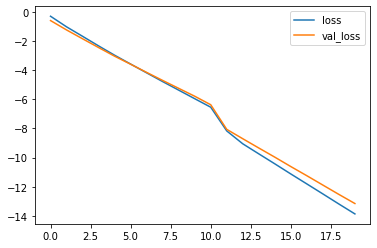

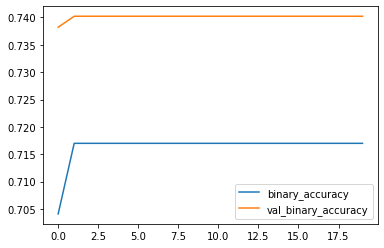

In [29]:
#  Começar a plotagem no epoch 0

def display_hist(history):
    history_df = pd.DataFrame(history.history)
    display(history_df.head())
    history_df.loc[0:,['loss','val_loss']].plot()
    history_df.loc[0:,['binary_accuracy','val_binary_accuracy']].plot()

    print(("Best validation loss: {:0.4f}" +\
       "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['binary_accuracy'].max()))

display_hist(history)

In [30]:
#  RESULTADOS COM A PRIMEIRA CONFIGURAÇÃO DE HIPERPARÂMETRO. 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_results(y_test,y_pred):
    print("Matriz de confusão: \n",confusion_matrix(y_test,y_pred))
    print(10*"---------")
    print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
    print("Acuracidade:", accuracy_score(y_test,y_pred))
    return
y_pred = model.predict(X_test) > 0.5

print_results(y_test, y_pred)

45/45 [==============================] - 0s 2ms/step
Matriz de confusão: 
 [[   0    2    0    0    0    0    0    0    0]
 [   0 1013    0    0    0    0    0    0    0]
 [   0   12    0    0    0    0    0    0    0]
 [   0   31    0    0    0    0    0    0    0]
 [   0   44    0    0    0    0    0    0    0]
 [   0   80    0    0    0    0    0    0    0]
 [   0   81    0    0    0    0    0    0    0]
 [   0   69    0    0    0    0    0    0    0]
 [   0   92    0    0    0    0    0    0    0]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        True       0.71      1.00      0.83      1013

   micro avg       0.71      1.00      0.83      1013
   macro avg       0.71      1.00      0.83      1013
weighted avg       0.71      1.00      0.83      1013

Acuracidade: 0.711376404494382


## Segundo Modelo

In [31]:
# Treinando o segundo modelo usando o Keras TensorFlow
# Com hiperparametros modificados

# Alterações => de 2 camadas passarei para 4 camadas
# mudei a quantidade de neuronios em cada camada e adicionarei o
# Dropout de 0.3 entre as camadas

model2 = keras.Sequential(layers.Dense(64, activation= 'sigmoid', input_shape=[7]))
model2.add(Dropout(0.3))
model2.add(layers.Dense(128, activation= 'relu'))
model2.add(Dropout(0.3))
model2.add(layers.Dense(32, activation= 'relu'))
model2.add(layers.Dense(1, activation= 'sigmoid'))

# Mudando o modo de compilação do modelo
model2.compile(
    loss='binary_crossentropy',

    metrics=['binary_accuracy'],
)



In [32]:
history2 = model2.fit(
    X_train2, y_train2,
    batch_size=32,
    validation_split=0.3,
    epochs=20,
    verbose=1,
)

Epoch 1/20
73/73 [==============================] - 3s 12ms/step - loss: -79.7903 - binary_accuracy: 0.7144 - val_loss: -233.7864 - val_binary_accuracy: 0.7402
Epoch 2/20
73/73 [==============================] - 1s 8ms/step - loss: -681.0023 - binary_accuracy: 0.7170 - val_loss: -1184.0020 - val_binary_accuracy: 0.7402
Epoch 3/20
73/73 [==============================] - 1s 12ms/step - loss: -2227.0659 - binary_accuracy: 0.7170 - val_loss: -3182.3552 - val_binary_accuracy: 0.7402
Epoch 4/20
73/73 [==============================] - 1s 10ms/step - loss: -5046.5083 - binary_accuracy: 0.7170 - val_loss: -6492.5244 - val_binary_accuracy: 0.7402
Epoch 5/20
73/73 [==============================] - 1s 10ms/step - loss: -9386.8535 - binary_accuracy: 0.7170 - val_loss: -11348.2441 - val_binary_accuracy: 0.7402
Epoch 6/20
73/73 [==============================] - 1s 16ms/step - loss: -15967.9551 - binary_accuracy: 0.7170 - val_loss: -18675.2051 - val_binary_accuracy: 0.7402
Epoch 7/20
73/73 [======

In [33]:
# Verificando os valores obtidos de loss e accuracy durante o 
# treino do segundo modelo 

history_df2 = pd.DataFrame(history2.history)
print(history_df2)

             loss  binary_accuracy       val_loss  val_binary_accuracy
0      -79.790314         0.714409    -233.786392             0.740221
1     -681.002319         0.716989   -1184.001953             0.740221
2    -2227.065918         0.716989   -3182.355225             0.740221
3    -5046.508301         0.716989   -6492.524414             0.740221
4    -9386.853516         0.716989  -11348.244141             0.740221
5   -15967.955078         0.716989  -18675.205078             0.740221
6   -24934.330078         0.716989  -28512.197266             0.740221
7   -37003.296875         0.716989  -41214.843750             0.740221
8   -52960.074219         0.716989  -57351.605469             0.740221
9   -72588.250000         0.716989  -78407.570312             0.740221
10  -98260.226562         0.716989 -104490.617188             0.740221
11 -128558.578125         0.716989 -134136.187500             0.740221
12 -163031.234375         0.716989 -169696.875000             0.740221
13 -20

In [34]:
def print_results(y_test2,y_pred2):
    print("Matriz de confusão: \n",confusion_matrix(y_test2,y_pred2))
    print(10*"---------")
    print(classification_report(y_test2,y_pred2,labels=np.unique(y_pred2)))
    print("Acuracidade:", accuracy_score(y_test2,y_pred2))
    return
y_pred2 = model2.predict(X_test2) > 0.5

print_results(y_test2, y_pred2)

45/45 [==============================] - 0s 4ms/step
Matriz de confusão: 
 [[   0    2    0    0    0    0    0    0    0]
 [   0 1013    0    0    0    0    0    0    0]
 [   0   12    0    0    0    0    0    0    0]
 [   0   31    0    0    0    0    0    0    0]
 [   0   44    0    0    0    0    0    0    0]
 [   0   80    0    0    0    0    0    0    0]
 [   0   81    0    0    0    0    0    0    0]
 [   0   69    0    0    0    0    0    0    0]
 [   0   92    0    0    0    0    0    0    0]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        True       0.71      1.00      0.83      1013

   micro avg       0.71      1.00      0.83      1013
   macro avg       0.71      1.00      0.83      1013
weighted avg       0.71      1.00      0.83      1013

Acuracidade: 0.711376404494382


In [35]:
#  A acuracidade dos dois modelos ficou igual.

## Terceiro Modelo - Keras Tuner

In [51]:
# Definindo o modelo utilizando keras-tuner 
def build_model(hp):
    
    model3 = keras.Sequential()
    model3.add(keras.layers.Dense(
    hp.Choice('units', [8, 16, 32]),
    activation='relu'))
    model3.add(keras.layers.Dense(1, activation='relu'))

    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])
    model3.compile(keras.optimizers.Adam(learning_rate=hp_learning_rate),
                   loss="categorical_crossentropy",
                   metrics=['binary_accuracy'])
               
    return model


In [67]:

tuner = kt.Hyperband(build_model,
                     objective='val_binary_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='mydir',
                     project_name="trilha_8_deep_learning_")

INFO:tensorflow:Reloading Oracle from existing project mydir/trilha_8_deep_learning_/oracle.json
INFO:tensorflow:Reloading Tuner from mydir/trilha_8_deep_learning_/tuner0.json


In [68]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train3, y_train3,
             batch_size=64,
             epochs=50,
             validation_split=0.3,
             callbacks=[stop_early])

best_hps=tuner.get_best_hyperparameters(num_trials=3)[0]

print(f""""
The hyperparameter search is complete.

The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


INFO:tensorflow:Oracle triggered exit
"
The hyperparameter search is complete.

The optimal learning rate for the optimizer is 0.0001.



In [69]:
# Construindo o modelo com os melhores hiperparametros e treinando os dados
# com 50 epochs

model3 = tuner.hypermodel.build(best_hps)

history3 = model3.fit(X_train3, y_train3,
                      batch_size=64,
                      epochs=50,
                      validation_split=0.3,
                      verbose=0)

val_acc_per_epoch = history3.history['val_binary_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Best epoch: 1


In [70]:
# Treinando novamente o modelo

hypermodel = tuner.hypermodel.build(best_hps)


hypermodel.fit(X_train3, y_train3,
               batch_size=64,
               epochs=best_epoch,
               validation_split=0.3)

37/37 [==============================] - 0s 6ms/step - loss: -106.3167 - binary_accuracy: 0.7170 - val_loss: -98.5715 - val_binary_accuracy: 0.7402


In [76]:
# Aplicando o modelo final na predição dos dados.

y_pred_ = np.argmax(model.predict(X_test3), axis=-1)

y_pred3 = y_test3*0
for i in range(len(y_pred3)):
    y_pred3.iloc[y_pred3] = 1

    



45/45 [==============================] - 0s 4ms/step


In [77]:
def print_results3(y_test3,y_pred3):
    print("Matriz de confusão: \n",confusion_matrix(y_test3,y_pred3))
    print(10*"---------")
    print(classification_report(y_test3,y_pred3,labels=np.unique(y_pred3)))
    print("Acuracidade:", accuracy_score(y_test3,y_pred3))
    return
y_pred3 = model3.predict(X_test3) > 0.5

print_results(y_test3, y_pred3)

45/45 [==============================] - 0s 3ms/step
Matriz de confusão: 
 [[   0    2    0    0    0    0    0    0    0]
 [   0 1013    0    0    0    0    0    0    0]
 [   0   12    0    0    0    0    0    0    0]
 [   0   31    0    0    0    0    0    0    0]
 [   0   44    0    0    0    0    0    0    0]
 [   0   80    0    0    0    0    0    0    0]
 [   0   81    0    0    0    0    0    0    0]
 [   0   69    0    0    0    0    0    0    0]
 [   0   92    0    0    0    0    0    0    0]]
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

        True       0.71      1.00      0.83      1013

   micro avg       0.71      1.00      0.83      1013
   macro avg       0.71      1.00      0.83      1013
weighted avg       0.71      1.00      0.83      1013

Acuracidade: 0.711376404494382
